In [1]:
# Upload packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px 

In [2]:
# Load data

y17 = pd.read_csv("th_data_2017.csv", delimiter='\t', on_bad_lines = 'skip', engine='python')
y18 = pd.read_csv("th_data_2018.csv", delimiter='\t', on_bad_lines = 'skip', engine='python')
y19 = pd.read_csv("th_data_2019.csv", delimiter='\t', on_bad_lines = 'skip', engine='python')
y20 = pd.read_csv("th_data_2020.csv", delimiter='\t', on_bad_lines = 'skip', engine='python')
y21 = pd.read_csv("th_data_2021.csv", delimiter='\t', on_bad_lines = 'skip', engine='python')


In [3]:
# Merging all years

merged = pd.concat((y17, y18, y19, y20, y21), sort=False)


In [4]:
# Filter data for THL: procurement_unit = National Institute for Health and Welfare
df = merged[merged['hankintayksikko'] == 'Terveyden ja hyvinvoinnin laitos'].reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lasku_id                239558 non-null  object 
 1   tili                    239558 non-null  object 
 2   tiliointisumma          239558 non-null  float64
 3   tositepvm               239558 non-null  object 
 4   toimittaja_y_tunnus     238299 non-null  object 
 5   toimittaja_nimi         239558 non-null  object 
 6   hankintayksikko_tunnus  239558 non-null  object 
 7   hankintayksikko         239558 non-null  object 
 8   ylaorganisaatio_tunnus  239558 non-null  object 
 9   ylaorganisaatio         239558 non-null  object 
 10  sektori                 239558 non-null  object 
 11  tuote_palveluryhma      239558 non-null  object 
 12  hankintakategoria       239558 non-null  object 
dtypes: float64(1), object(12)
memory usage: 23.8+ MB


In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Spending and Transactions Overview

In [7]:
# Total Spend of The Two-Year period

total_spend = sum(df['tiliointisumma'])
total_txn = df['lasku_id'].count()
print('The total spend of the last five years is: {:,.0f} euros'.format(total_spend))
print('The total transactions of the last five years is: {:,.0f} transactions'.format(total_txn))

The total spend of the last five years is: 711,205,138 euros
The total transactions of the last five years is: 239,558 transactions


In [8]:
# Format invoice entry date (tositepvm) into Year-Month, add new column (year)

df["tositepvm"] = pd.to_datetime(df["tositepvm"], dayfirst=True).dt.strftime("%Y-%m")
df["year"] = pd.to_datetime(df["tositepvm"], dayfirst=True).dt.strftime("%Y")


In [9]:
# Total spending per year in thousands

total_spend_by_year = df.groupby('year')['tiliointisumma'].sum()
spend_p_year = total_spend_by_year.reset_index().sort_values(by=['year'], ignore_index=True)
spend_p_year

year  tiliointisumma
0  2017     99655169.36
1  2018    102679403.26
2  2019    110345605.89
3  2020    120180649.35
4  2021    278344310.20

In [10]:
# Number of transactions per year

txn_per_year = df['year'].value_counts().reset_index().sort_values(by=['year'], ignore_index=True)
txn_per_year

year  count
0  2017  45858
1  2018  46667
2  2019  46392
3  2020  46590
4  2021  54051

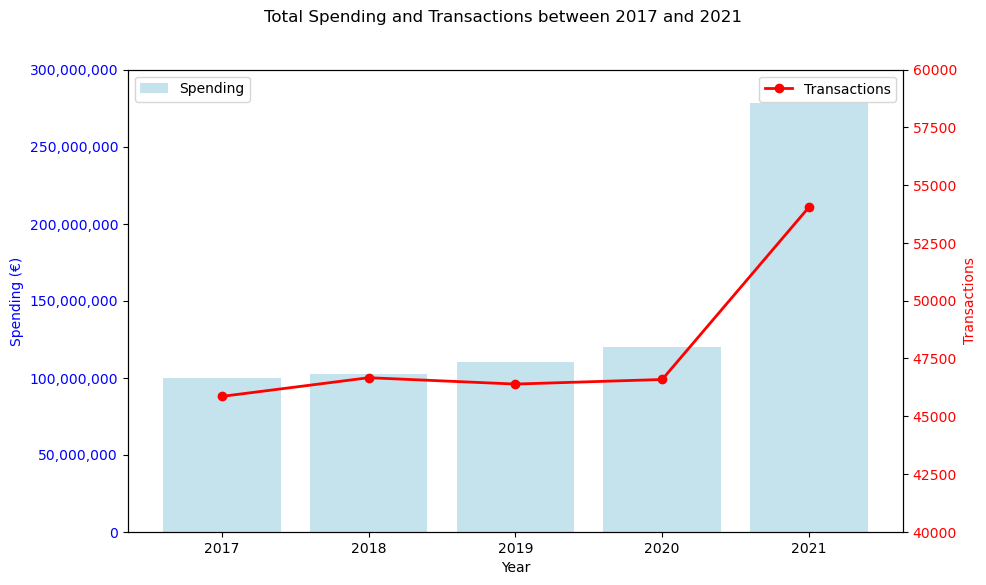

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for spending
ax1.bar(spend_p_year['year'], spend_p_year['tiliointisumma'], color='lightblue', alpha=0.7, label='Spending')
ax1.set_xlabel('Year')
ax1.set_ylabel('Spending (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# Line plot for transactions
ax2 = ax1.twinx()
ax2.plot(txn_per_year['year'], txn_per_year['count'], color='red', marker='o', linewidth=2, label='Transactions')
ax2.set_ylabel('Transactions', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set y-axis limit for Spending and Transactions
ax1.set_ylim(0, 300000000)
ax2.set_ylim(40000, 60000)

# Title and legend
fig.suptitle('Total Spending and Transactions between 2017 and 2021', fontsize=12)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
fig.savefig('Total Spending and Transactions between 2017 and 2021.png', dpi=300, bbox_inches='tight')

In [12]:
# Analysis for 2020 and 2021
total_spend_20 = df[df['year'] == '2020']['tiliointisumma'].sum()
total_spend_21 = df[df['year'] == '2021']['tiliointisumma'].sum()

print('The total spend in 2020 is: {:,.0f} euros'.format(total_spend_20))
print('The total spend in 2021 is: {:,.0f} euros'.format(total_spend_21))

spend_p_month_20_21 = df[df['year'].isin(['2020', '2021'])].groupby('tositepvm')['tiliointisumma'].sum()
spend_p_month_20_21 = spend_p_month_20_21.reset_index().sort_values(by=['tositepvm'], ignore_index=True)

txn_p_month_20_21 = df[df['year'].isin(['2020', '2021'])]['tositepvm'].value_counts()
txn_p_month_20_21 = txn_p_month_20_21.reset_index().sort_values(by=['tositepvm'], ignore_index=True)


The total spend in 2020 is: 120,180,649 euros
The total spend in 2021 is: 278,344,310 euros


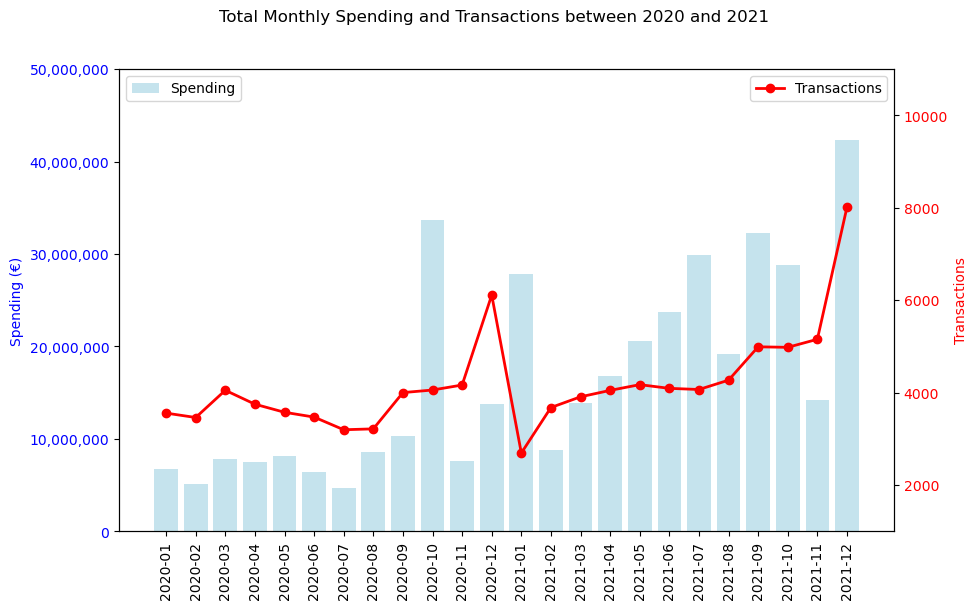

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for spending
ax1.bar(spend_p_month_20_21['tositepvm'], spend_p_month_20_21['tiliointisumma'], color='lightblue', alpha=0.7, label='Spending')
ax1.set_ylabel('Spending (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', labelrotation=90)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# Line plot for transactions
ax2 = ax1.twinx()
ax2.plot(txn_p_month_20_21 ['tositepvm'], txn_p_month_20_21 ['count'], color='red', marker='o', linewidth=2, label='Transactions')
ax2.set_ylabel('Transactions', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set y-axis limit for Spending and Transactions
ax1.set_ylim(0, 50000000)
ax2.set_ylim(1000, 11000)


# Title and legend
fig.suptitle('Total Monthly Spending and Transactions between 2020 and 2021', fontsize=12)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Show the plot
plt.show()
fig.savefig('Total Monthly Spending and Transactions between 2020 and 2021.png', dpi=300, bbox_inches='tight')

## Supplier Category Overview

In [14]:
# Number of supplier category
df['hankintakategoria'] = df['hankintakategoria'].replace({'Koneet, laitteet ja kuljetusvälineet': 'Machinery, equipment and vehicles',
                                                           'Hallinnolliset palvelut': 'Administrative services',
                                                           'Aineet, tarvikkeet ja tavarat': 'Materials, goods and supplies',
                                                           'Majoitus- ja ravitsemispalvelut': 'Accommodation and catering services',
                                                           'Matkustus- ja kuljetuspalvelut': 'Travel and transportation services',
                                                           'ICT-hankinnat (tavarat, palvelut ja ohjelmistot)': 'ICT procurement',
                                                           'Koulutus- ja kulttuuripalvelut': 'Educational and cultural services',
                                                           'Rakennusten ja alueiden ylläpito': 'Building and area maintenance',
                                                           'Asiantuntija- ja toimistopalvelut': 'Expert and office services',
                                                           'Henkilöstöpalvelut': 'Human resource services',
                                                           'Rakentaminen': 'Construction'})
sup_cat = pd.Series(df['hankintakategoria'].unique())
no_of_suppliers = len(sup_cat)
print('Number of supplier categories is:', no_of_suppliers)

Number of supplier categories is: 11


In [15]:
suppliers_by_category = df.groupby(['hankintakategoria'])['toimittaja_nimi'].nunique()
suppliers_by_category

hankintakategoria
Accommodation and catering services     403
Administrative services                1913
Building and area maintenance           365
Construction                             46
Educational and cultural services      1037
Expert and office services             1089
Human resource services                  62
ICT procurement                         389
Machinery, equipment and vehicles       584
Materials, goods and supplies          1995
Travel and transportation services      509
Name: toimittaja_nimi, dtype: int64

In [16]:
spend_by_category = df.groupby(['hankintakategoria'])['tiliointisumma'].sum()
spend_by_category

hankintakategoria
Accommodation and catering services     2269963.95
Administrative services                82269919.14
Building and area maintenance          89184891.32
Construction                             258792.95
Educational and cultural services       6254442.30
Expert and office services            105780411.49
Human resource services                 9145090.94
ICT procurement                        49078054.70
Machinery, equipment and vehicles      12438403.90
Materials, goods and supplies         351898793.09
Travel and transportation services      2626374.28
Name: tiliointisumma, dtype: float64

In [17]:
# Number of suppliers by category

suppliers_by_cate = df.groupby(['year', 'hankintakategoria'])['toimittaja_nimi'].nunique()
supplier_p_cat = suppliers_by_cate.reset_index().sort_values(by=['year'])

In [18]:
# Total spending by category

spending_by_cate = df.groupby(['year', 'hankintakategoria'])['tiliointisumma'].sum()
spending_p_cat = spending_by_cate.reset_index().sort_values(by=['year'])

In [19]:
# Merge the DataFrames
df_merged = pd.merge(supplier_p_cat, spending_p_cat, on=["year", "hankintakategoria"])

#### Overview of Spending and Supplier Distribution by Category

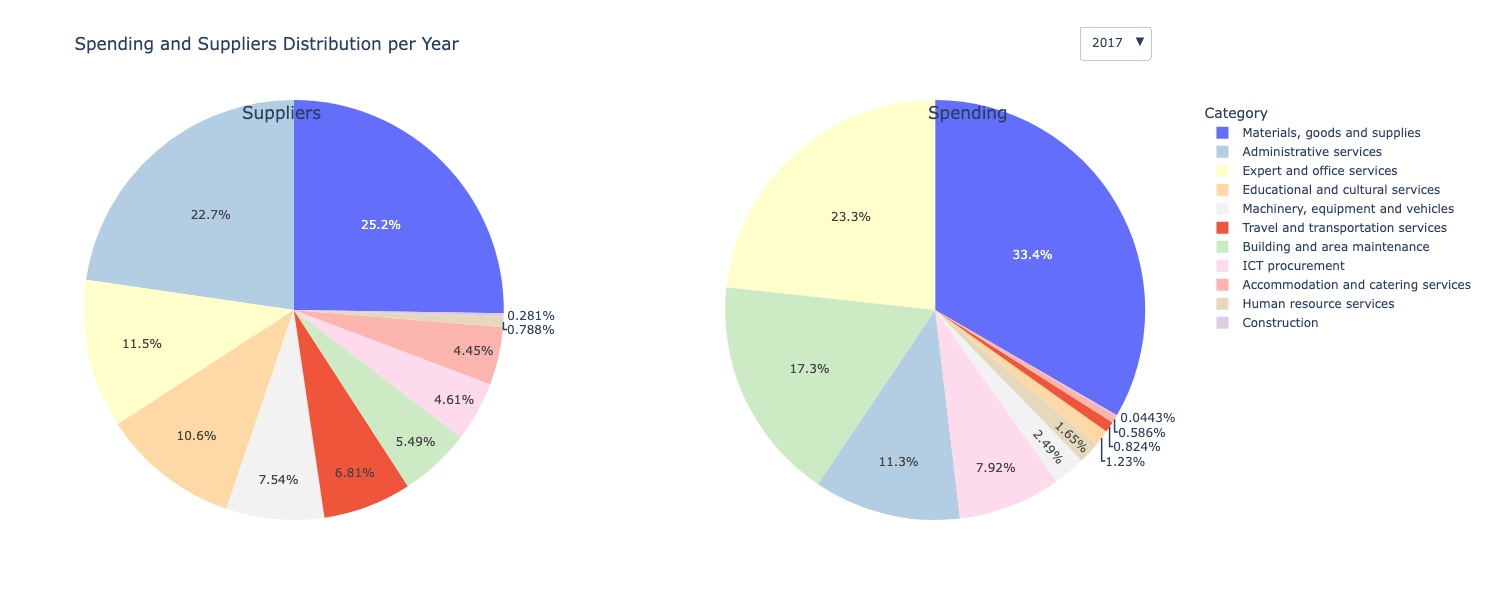

In [20]:
years = df_merged['year'].unique()
buttons = []
fig = go.Figure()

colors = px.colors.qualitative.Pastel1

for year in years:
    year_data = df_merged[df_merged['year'] == year]
    fig.add_trace(go.Pie(
        labels=year_data['hankintakategoria'],
        values=year_data['toimittaja_nimi'],
        name='Supplier',
        domain=dict(x=[0, 0.4]),
        visible=(year == years[0]),
        marker=dict(colors=colors[:len(year_data['hankintakategoria'].unique())]),
        )
    )
    
    fig.add_trace(go.Pie(
        labels=year_data['hankintakategoria'],
        values=year_data['tiliointisumma'],
        name='Spending',
        domain=dict(x=[0.6, 1]),
        visible=(year == years[0]),
        marker=dict(colors=colors[:len(year_data['hankintakategoria'].unique())])
        )
    )

# Add dropdown menu
for year in years:
    visibility = [year == yr for yr in years for _ in range(2)]
    buttons.append(
        dict(
            label=year,
            method='update',
            args=[
                {"visible": visibility},  # Visibility for each trace
                {"title": f"Spending and Supplier Distribution for {year}"}
            ]
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=1.01,  # Top-right position
            xanchor="right",
            y=1.2,
            yanchor="top",
            pad={"r": 10, "t": 10},
            showactive=True,
        )
    ],
    title="Spending and Suppliers Distribution per Year",
    annotations=[
        dict(text="Suppliers", x=0.15, y=1, font_size=17, showarrow=False),
        dict(text="Spending", x=0.87, y=1, font_size=17, showarrow=False)
    ],
    legend=dict(
        title="Category",
        x=1.05,  # Place legend to the right
        y=1,  # Align legend to the top
        xanchor="left",
        yanchor="top"
    ),
    width=1200,  # Adjust width
    height=600,  # Adjust height
)
                 
                  
        

#### Spending and Supplier per Category Throughout Time Period

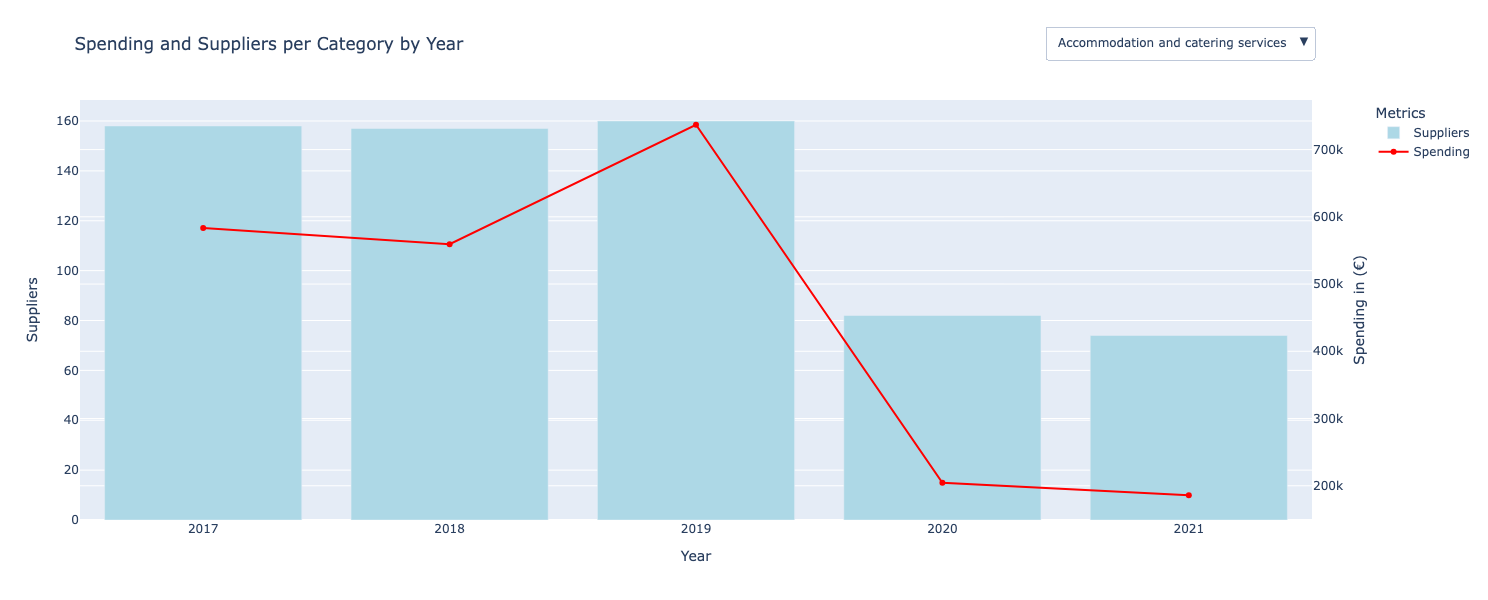

In [21]:
categories = df_merged['hankintakategoria'].unique()
fig = go.Figure()

# Add traces for each category (initially visible=False except the first one)
for category in categories:
    category_data = df_merged[df_merged['hankintakategoria'] == category]
    fig.add_bar(
        x=category_data['year'],
        y=category_data['toimittaja_nimi'],
        name='Suppliers',
        visible=(category == categories[0]),
        marker=dict(color='lightblue'),
        yaxis="y1"
    )
    fig.add_scatter(
        x=category_data['year'],
        y=category_data['tiliointisumma'],
        mode='lines+markers',
        name='Spending',
        visible=(category == categories[0]),
        marker=dict(color='red'),
        yaxis="y2"
    )

# Update layout to add dropdown menu
buttons = []
for category in categories:
    visibility = [category == cat for cat in categories for _ in range(2)]  # Two traces per category
    buttons.append(
        dict(
            label=category,
            method="update",
            args=[
                {"visible": visibility},  # Visibility for each trace
                {"title": f"Spending and Suppliers for {category}"}
            ]
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=1.01,  # Top-right position
            xanchor="right",
            y=1.2,
            yanchor="top",
            pad={"r": 10, "t": 10},
            showactive=True,
        )
    ],
    title="Spending and Suppliers per Category by Year",
    xaxis_title="Year",
    yaxis=dict(
        title="Suppliers",
        side="left"
    ),
    yaxis2=dict(
        title="Spending in (€)",
        side="right",
        overlaying="y"
    ),
    legend=dict(
        title="Metrics",
        x=1.05,  # Place legend to the right
        y=1,  # Align legend to the top
        xanchor="left",
        yanchor="top"
    ),
    width=1000,  # Adjust width
    height=600,  # Adjust height
)

# Show the interactive plot
fig.show()

In [22]:
Spend_p_cat_by_20_21 = df[df['year'].isin(['2020', '2021'])].groupby(['hankintakategoria', 'year'])['tiliointisumma'].sum().sort_values(ascending=True)
Spend_p_cat_by_20_21 = Spend_p_cat_by_20_21.unstack(level=1).reset_index()
Spend_p_cat_by_20_21

year                    hankintakategoria        2020         2021
0     Accommodation and catering services   204304.52    185891.94
1                 Administrative services 27941552.96  14851221.69
2           Building and area maintenance 17339878.08  19718899.62
3                            Construction   115045.61     30893.71
4       Educational and cultural services  1044951.89   1417174.48
5              Expert and office services 17036024.22  21102847.50
6                 Human resource services  1863268.21   2007016.02
7                         ICT procurement 10386606.73  13557425.22
8       Machinery, equipment and vehicles  3420941.92   2971087.49
9           Materials, goods and supplies 40633001.42 202310850.70
10     Travel and transportation services   195073.79    191001.83

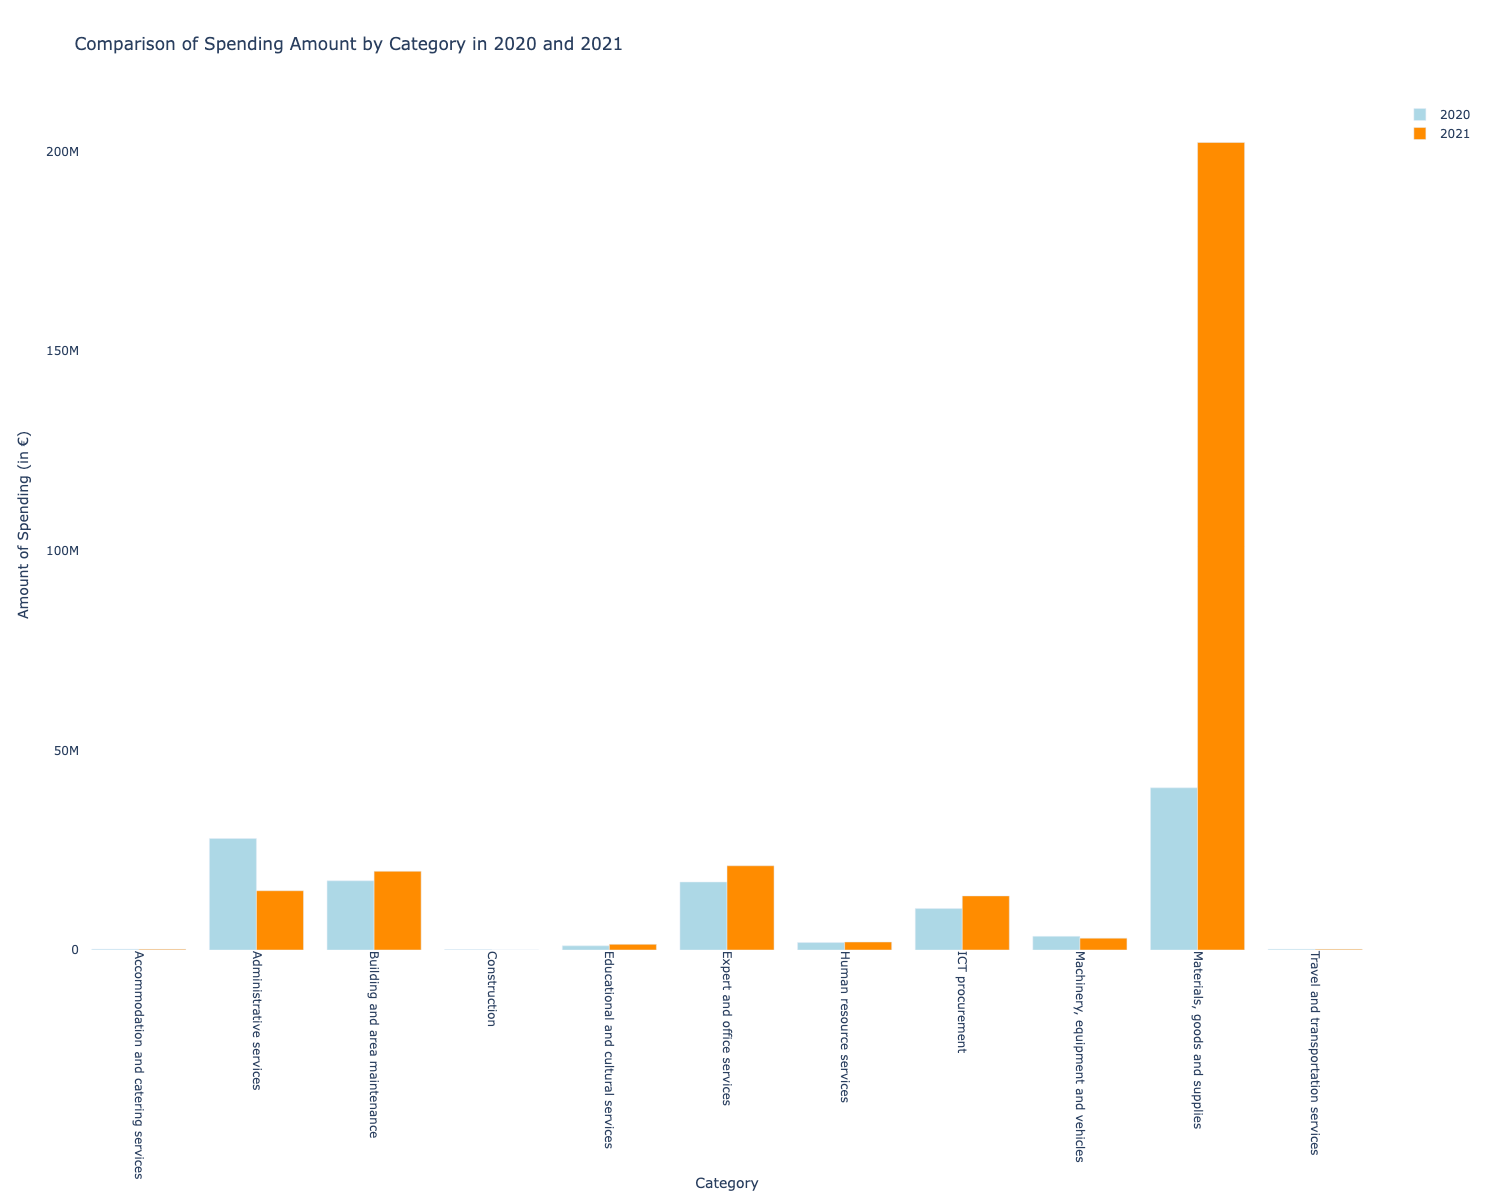

In [48]:

# Prepare the data for the bar plot
fig = go.Figure()

# Add bars for 2020 and 2021
fig.add_trace(go.Bar(
    x=Spend_p_cat_by_20_21['hankintakategoria'], 
    y=Spend_p_cat_by_20_21['2020'],
    name='2020',
    marker_color='lightblue'
))

fig.add_trace(go.Bar(
    x=Spend_p_cat_by_20_21['hankintakategoria'], 
    y=Spend_p_cat_by_20_21['2021'],
    name='2021',
    marker_color='darkorange'
))

# Update layout for gridlines, axis labels, title, etc.
fig.update_layout(
    title='Comparison of Spending Amount by Category in 2020 and 2021',
    xaxis_title='Category',
    yaxis_title='Amount of Spending (in €)',
    barmode='group',
    xaxis_tickangle=90,
    showlegend=True,
    plot_bgcolor='white',  # Optional: set the background color,
    width=1200,
    height=1200
    )


# Show the plot
fig.show()
fig.write_image('Comparison of Spending Amount by Category in 2020 and 2021.png')

## Supplier Overview

In [24]:
# Number of suppliers

no_of_suppliers = df['toimittaja_nimi'].nunique()
print('Number of suppliers is:', no_of_suppliers)

Number of suppliers is: 5527


In [25]:
# Number of suppliers by year

suppliers_by_year= df.groupby('year')['toimittaja_nimi'].nunique()
supplier_p_year = suppliers_by_year.reset_index().sort_values(by=['year'], ignore_index=True)
supplier_p_year

year  toimittaja_nimi
0  2017             2511
1  2018             2459
2  2019             2355
3  2020             2037
4  2021             2065

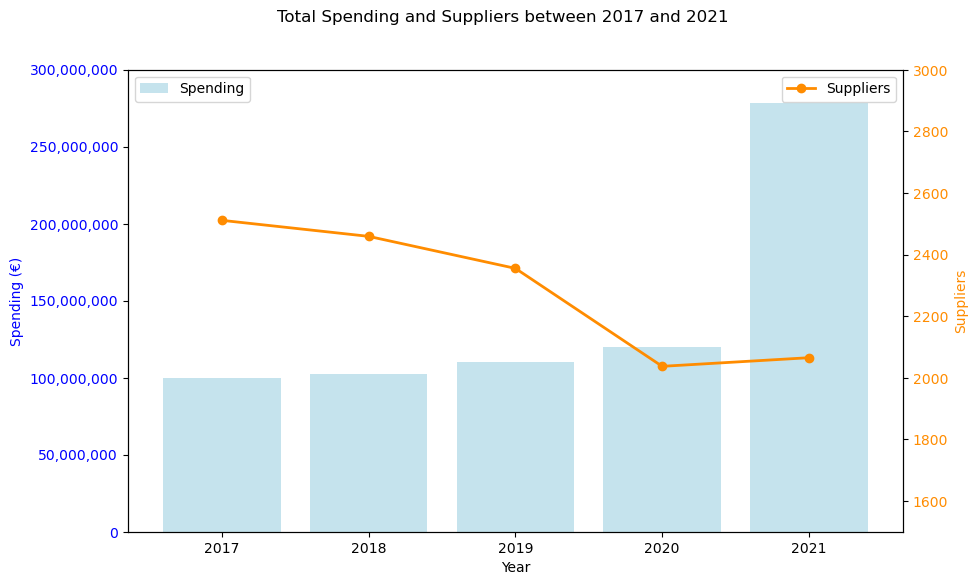

In [49]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for spending
ax1.bar(spend_p_year['year'], spend_p_year['tiliointisumma'], color='lightblue', alpha=0.7, label='Spending')
ax1.set_xlabel('Year')
ax1.set_ylabel('Spending (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# Line plot for suppliers
ax2 = ax1.twinx()
ax2.plot(supplier_p_year['year'], supplier_p_year['toimittaja_nimi'], color='darkorange', marker='o', linewidth=2, label='Suppliers')
ax2.set_ylabel('Suppliers', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Set y-axis limit for Spending and Transactions
ax1.set_ylim(0, 300000000)
ax2.set_ylim(1500, 3000)

# Title and legend
fig.suptitle('Total Spending and Suppliers between 2017 and 2021', fontsize=12)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
fig.savefig('Total Spending and Suppliers between 2017 and 2021.png', dpi=100, bbox_inches='tight')

In [27]:
sup_p_month_20_21 = df[df['year'].isin(['2020', '2021'])].groupby('tositepvm')['toimittaja_nimi'].nunique()
sup_p_month_20_21 = sup_p_month_20_21.reset_index().sort_values(by=['tositepvm'], ignore_index=True)

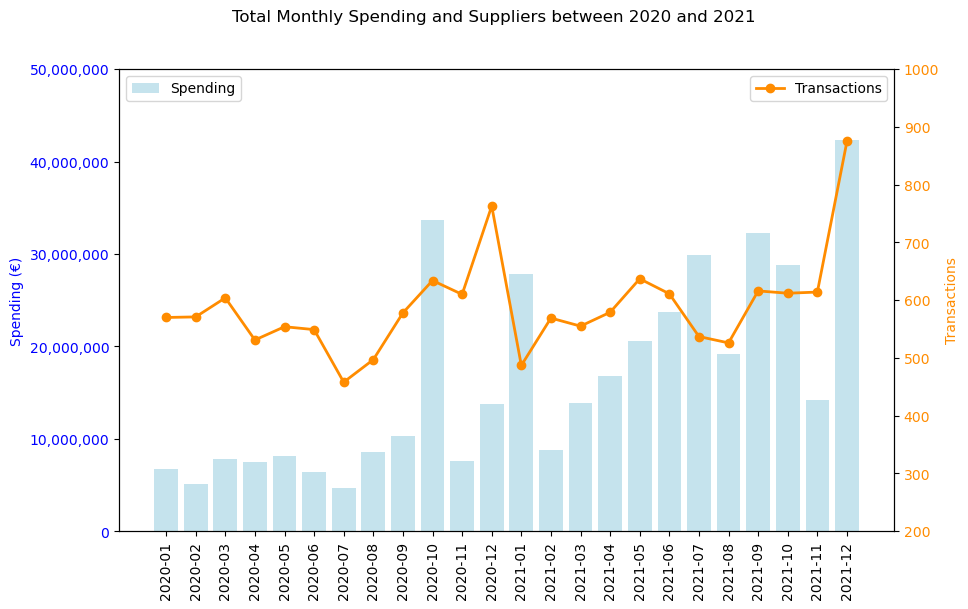

In [50]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for spending
ax1.bar(spend_p_month_20_21['tositepvm'], spend_p_month_20_21['tiliointisumma'], color='lightblue', alpha=0.7, label='Spending')
ax1.set_ylabel('Spending (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', labelrotation=90)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# Line plot for suppliers
ax2 = ax1.twinx()
ax2.plot(sup_p_month_20_21 ['tositepvm'], sup_p_month_20_21 ['toimittaja_nimi'], color='darkorange', marker='o', linewidth=2, label='Transactions')
ax2.set_ylabel('Transactions', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Set y-axis limit for Spending and Transactions
ax1.set_ylim(0, 50000000)
ax2.set_ylim(200, 1000)


# Title and legend
fig.suptitle('Total Monthly Spending and Suppliers between 2020 and 2021', fontsize=12)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Show the plot
plt.show()
fig.savefig('Total Monthly Spending and Suppliers between 2020 and 2021.png', dpi=100, bbox_inches='tight')

In [29]:
# Average spending per supplier

Spending_p_supplier_20 = df.loc[df['year'] == '2020'].groupby('toimittaja_nimi')['tiliointisumma'].sum().sort_values(ascending=False)
Spending_p_supplier_21 = df.loc[df['year'] == '2021'].groupby('toimittaja_nimi')['tiliointisumma'].sum().sort_values(ascending=False)

print('The average spending per supplier in 2020 is: {:,.0f} euros\n'.format(Spending_p_supplier_20.mean()))
print('The average spending per supplier in 2021 is: {:,.0f} euros\n'.format(Spending_p_supplier_21.mean()))

print('The median spending per supplier in 2020 is: {:,.0f} euros\n'.format(Spending_p_supplier_20.median()))
print('The median spending per supplier in 2021 is: {:,.0f} euros\n'.format(Spending_p_supplier_21.median()))

The average spending per supplier in 2020 is: 58,999 euros

The average spending per supplier in 2021 is: 134,791 euros

The median spending per supplier in 2020 is: 1,248 euros

The median spending per supplier in 2021 is: 1,403 euros



In [30]:
# Top 10 suppliers with Highest Spending in 2021 and 2020
# 2021
Top_10_suppliers_most_spent_21= df.loc[df['year'] == '2021'].groupby(['toimittaja_nimi','hankintakategoria', 'year'] )['tiliointisumma'].sum().sort_values(ascending=False).head(10)
Top10_most_spent_21 = Top_10_suppliers_most_spent_21.reset_index()

#2020
Top_10_suppliers_most_spent_20= df.loc[df['year'] == '2020'].groupby(['toimittaja_nimi','hankintakategoria', 'year'] )['tiliointisumma'].sum().sort_values(ascending=False).head(10)
Top10_most_spent_20 = Top_10_suppliers_most_spent_20.reset_index()


In [31]:
Top10_most_spent_20['rank'] = Top10_most_spent_20['tiliointisumma'].rank(ascending=False, method='min')
Top10_most_spent_21['rank'] = Top10_most_spent_21['tiliointisumma'].rank(ascending=False, method='min')

# Merge the dataframes for easy comparison
Top10_most_spent_merged = pd.merge(Top10_most_spent_20[['toimittaja_nimi', 'tiliointisumma', 'rank']], 
                     Top10_most_spent_21[['toimittaja_nimi', 'tiliointisumma', 'rank']], 
                     on='rank', 
                     suffixes=('_2020', '_2021'))

In [32]:
Top10_most_spent_merged 

toimittaja_nimi_2020  tiliointisumma_2020  \
0                                  Salassa pidettävä          17667265.03   
1                               Senaatti-kiinteistöt          15203122.65   
2                                          Sanofi Oy           9802278.60   
3                                 GlaxoSmithKline Oy           9264631.50   
4  Valtion tieto- ja viestintätekniikkakeskus Val...           6841399.70   
5                                     MSD Finland Oy           4992068.00   
6                                 SEQIRUS UK LIMITED           2709000.00   
7                                    Astra Zeneca Oy           2293500.00   
8                                  Oriola Finland Oy           2220428.15   
9                                      Meira Nova Oy           2090695.27   

   rank                               toimittaja_nimi_2021  \
0  1.00                                          Pfizer Oy   
1  2.00                         Moderna Biotech Spain S.L.   
2  3.00                               Senaatti-kiinteistöt   
3  4.00                                          Sanofi Oy   
4  5.00  Valtion tieto- ja viestintätekniikkakeskus Val...   
5  6.00                                     MSD Finland Oy   
6  7.00                                 GlaxoSmithKline Oy   
7  8.00                                  Salassa pidettävä   
8  9.00                                  KANSANELÄKELAITOS   
9 10.00                                  Salassa pidettävä   

   tiliointisumma_2021  
0         123733539.09  
1          36103639.10  
2          17241619.93  
3          13131265.80  
4           8261812.39  
5           6237598.98  
6           5505084.60  
7           4330663.01  
8           3578317.02  
9           3217967.91

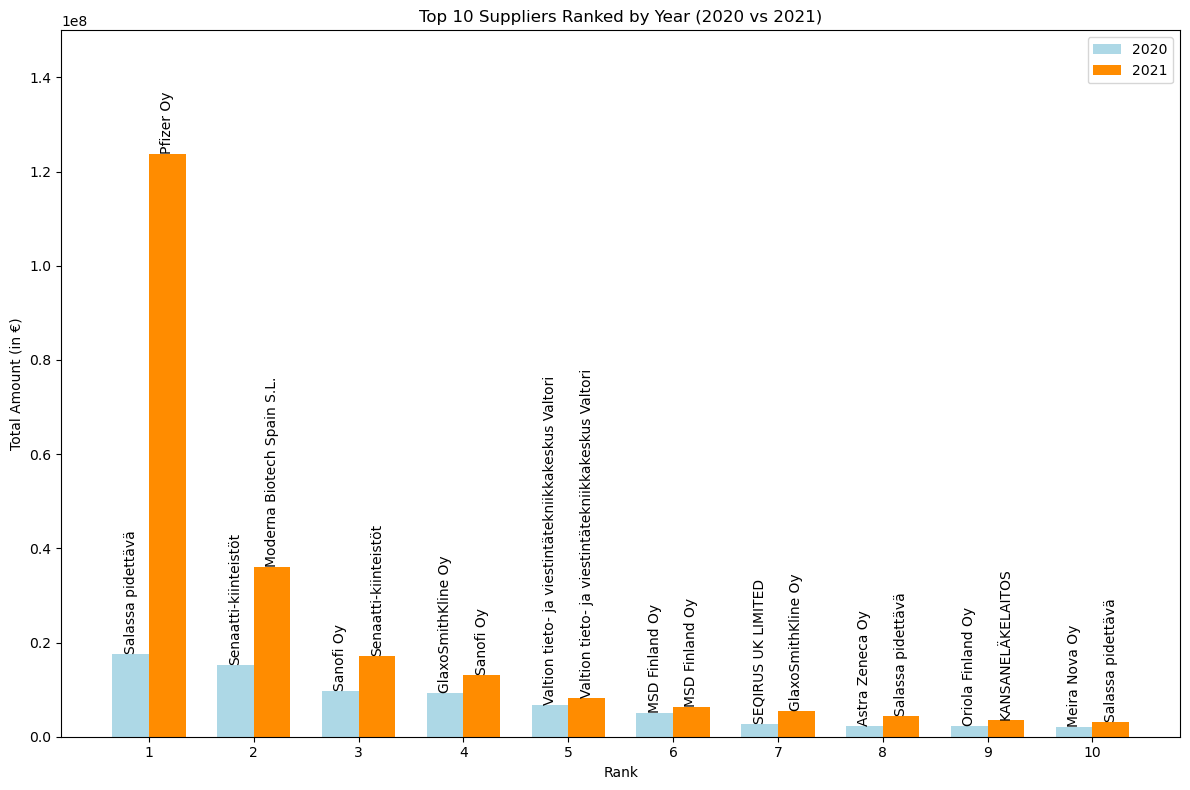

In [51]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.35

# X locations for the groups
index = np.arange(1, 11)

# Plot bars for 2020 and 2021 side by side
bars1 = ax.bar(index - bar_width / 2, Top10_most_spent_merged['tiliointisumma_2020'], bar_width, label='2020', color='lightblue')
bars2 = ax.bar(index + bar_width / 2, Top10_most_spent_merged['tiliointisumma_2021'], bar_width, label='2021', color='darkorange')

# Adding labels and title
ax.set_xlabel('Rank')
ax.set_ylabel('Total Amount (in €)')
ax.set_title('Top 10 Suppliers Ranked by Year (2020 vs 2021)')
ax.set_xticks(index)
ax.set_ylim(0,150000000)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(ha='center')

# Add supplier names on top of the corresponding bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Annotating the supplier name above the bars for 2020
    ax.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 5,  
            Top10_most_spent_merged['toimittaja_nimi_2020'].iloc[i], ha='center', va='bottom', color='black', fontsize=10, rotation=90)

    # Annotating the supplier name above the bars for 2021
    ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 5, 
            Top10_most_spent_merged['toimittaja_nimi_2021'].iloc[i], ha='center', va='bottom', color='black', fontsize=10, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig('Top 10 Suppliers Ranked by Year (2020 vs 2021)', dpi=100, bbox_inches='tight')

In [34]:
Spend_per_supplier_20 = Spending_p_supplier_20.reset_index()
new_row = {'toimittaja_nimi':'Others', 'tiliointisumma':0}
new_row_df = pd.DataFrame([new_row])
Spend_per_supplier_20  = pd.concat([Spend_per_supplier_20, new_row_df], ignore_index=True)

other = []

for i in range(len(Spend_per_supplier_20)-1):
    if i > 10:
        Spend_per_supplier_20.at[2037, 'tiliointisumma'] += Spend_per_supplier_20.loc[i, "tiliointisumma"]
        other.append(Spend_per_supplier_20.loc[i, "toimittaja_nimi"])
        Spend_per_supplier_20 = Spend_per_supplier_20.drop(i)
    else:
        pass
    
Spend_per_supplier_20.reset_index(inplace=True)
Spend_per_supplier_20['Percentage'] = 0.00
for i in range(len(Spend_per_supplier_20)):
    Spend_per_supplier_20.loc[i, 'Percentage'] = Spend_per_supplier_20.loc[i, "tiliointisumma"] / total_spend_20 * 100
    
Spend_per_supplier_20.drop(columns='index', inplace=True)
Spend_per_supplier_20

toimittaja_nimi  tiliointisumma  \
0                                   Salassa pidettävä     19218644.20   
1                                Senaatti-kiinteistöt     15455584.41   
2                                           Sanofi Oy      9802278.60   
3                                  GlaxoSmithKline Oy      9264631.50   
4   Valtion tieto- ja viestintätekniikkakeskus Val...      6855507.34   
5                                      MSD Finland Oy      4992068.00   
6                                  SEQIRUS UK LIMITED      2709000.00   
7                                   Oriola Finland Oy      2542192.72   
8                                     Astra Zeneca Oy      2293500.00   
9                                       Meira Nova Oy      2093284.16   
10  Valtion talous- ja henkilöstöhallinnon palvelu...      1693261.20   
11                                             Others     43260697.22   

    Percentage  
0        15.99  
1        12.86  
2         8.16  
3         7.71  
4         5.70  
5         4.15  
6         2.25  
7         2.12  
8         1.91  
9         1.74  
10        1.41  
11       36.00

In [35]:
Spend_per_supplier_21 = Spending_p_supplier_21.reset_index()
Spend_per_supplier_21  = pd.concat([Spend_per_supplier_21, new_row_df], ignore_index=True)

other = []

for i in range(len(Spend_per_supplier_21)-1):
    if i > 10:
        Spend_per_supplier_21.at[2065, 'tiliointisumma'] += Spend_per_supplier_21.loc[i, "tiliointisumma"]
        other.append(Spend_per_supplier_21.loc[i, "toimittaja_nimi"])
        Spend_per_supplier_21 = Spend_per_supplier_21.drop(i)
    else:
        pass
    
Spend_per_supplier_21.reset_index(inplace=True)
Spend_per_supplier_21['Percentage'] = 0.00
for i in range(len(Spend_per_supplier_21)):
    Spend_per_supplier_21.loc[i, 'Percentage'] = Spend_per_supplier_21.loc[i, "tiliointisumma"] / total_spend_21 * 100
    
Spend_per_supplier_21.drop(columns='index', inplace=True)
Spend_per_supplier_21

toimittaja_nimi  tiliointisumma  \
0                                           Pfizer Oy    123733539.09   
1                          Moderna Biotech Spain S.L.     36103639.10   
2                                Senaatti-kiinteistöt     17983082.43   
3                                           Sanofi Oy     13131265.80   
4   Valtion tieto- ja viestintätekniikkakeskus Val...      8261812.39   
5                                   Salassa pidettävä      7749386.63   
6                                      MSD Finland Oy      6237598.98   
7                                  GlaxoSmithKline Oy      5505084.60   
8                                 HELSINGIN YLIOPISTO      3636257.45   
9                                   KANSANELÄKELAITOS      3584230.63   
10                                  Oriola Finland Oy      2848906.36   
11                                             Others     49569506.74   

    Percentage  
0        44.45  
1        12.97  
2         6.46  
3         4.72  
4         2.97  
5         2.78  
6         2.24  
7         1.98  
8         1.31  
9         1.29  
10        1.02  
11       17.81

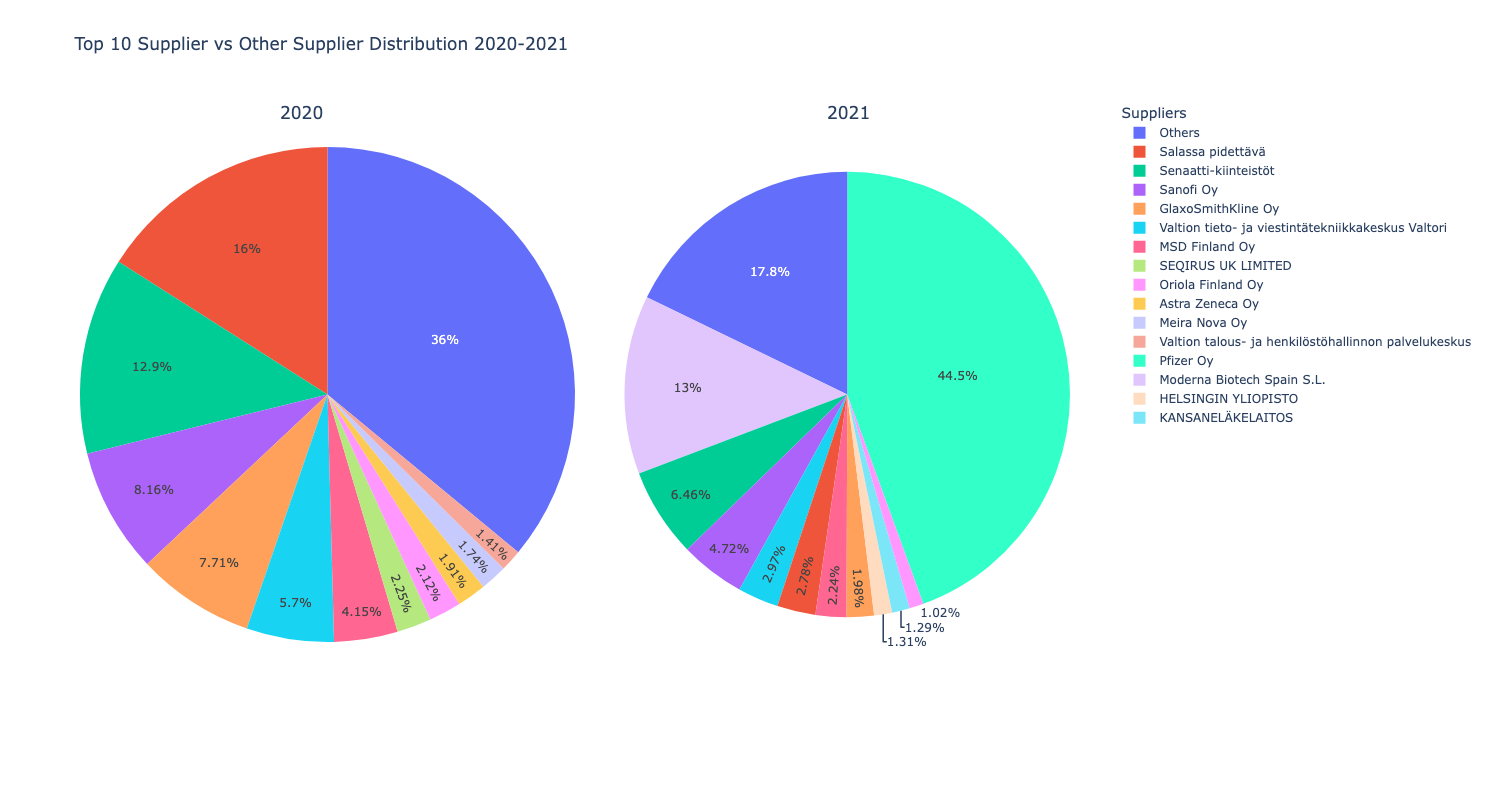

In [36]:
fig = go.Figure()



fig.add_trace(go.Pie(
        labels=Spend_per_supplier_20['toimittaja_nimi'],
        values=Spend_per_supplier_20['Percentage'],
        name='2020',
        domain=dict(x=[0, 0.50])
        )
    )
    
fig.add_trace(go.Pie(
        labels=Spend_per_supplier_21['toimittaja_nimi'],
        values=Spend_per_supplier_21['Percentage'],
        name='2021',
        domain=dict(x=[0.55, 1])
        )
    )

fig.update_layout(
    title="Top 10 Supplier vs Other Supplier Distribution 2020-2021",
    annotations=[
        dict(text="2020", x=0.20, y=1, font_size=17, showarrow=False),
        dict(text="2021", x=0.80, y=1, font_size=17, showarrow=False)
    ],
    legend=dict(
        title="Suppliers",
        x=1.05,  # Place legend to the right
        y=1,  # Align legend to the top
        xanchor="left",
        yanchor="top"
    ),
    width=1200,  # Adjust width
    height=800,  # Adjust height
)
                 
                  
        

In [37]:
# Group by 'hankintakategoria' and 'toimittaja_nimi', and aggregate 'tiliointisumma' by sum
spend_by_sup_and_cat_21 = df.loc[df['year'] == '2021'].groupby(['hankintakategoria', 'toimittaja_nimi'])['tiliointisumma'].sum()

# Find the maximum tiliintisumma per 'hankintakategoria'
max_spend_per_cat_21 = spend_by_sup_and_cat_21.groupby('hankintakategoria').max().reset_index()

# Find the total tiliintisumma per 'hankintakategoria'
total_spend_per_cat_21 = spend_by_sup_and_cat_21.groupby('hankintakategoria').sum().reset_index()
total_spend_per_cat_21 = total_spend_per_cat_21.rename(columns={'tiliointisumma': 'sum_tiliointisumma'})

# Merge the max spend per category to get all relevant data for the max spend rows
df21 = spend_by_sup_and_cat_21.reset_index().merge(max_spend_per_cat_21, on=['hankintakategoria', 'tiliointisumma'])
df21 = df21.merge(total_spend_per_cat_21, on=['hankintakategoria'])
df21['pct'] = df21['tiliointisumma'] / df21['sum_tiliointisumma'] * 100
df21 = df21.sort_values(by=['tiliointisumma'], ascending=False, ignore_index=True)

In [38]:
# Group by 'hankintakategoria' and 'toimittaja_nimi', and aggregate 'tiliointisumma' by sum
spend_by_sup_and_cat_20 = df.loc[df['year'] == '2020'].groupby(['hankintakategoria', 'toimittaja_nimi'])['tiliointisumma'].sum()

# Find the maximum tiliintisumma per 'hankintakategoria'
max_spend_per_cat_20 = spend_by_sup_and_cat_20.groupby('hankintakategoria').max().reset_index()

# Find the total tiliintisumma per 'hankintakategoria'
total_spend_per_cat_20 = spend_by_sup_and_cat_20.groupby('hankintakategoria').sum().reset_index()
total_spend_per_cat_20 = total_spend_per_cat_20.rename(columns={'tiliointisumma': 'sum_tiliointisumma'})

# Merge the max spend per category to get all relevant data for the max spend rows
df20 = spend_by_sup_and_cat_20.reset_index().merge(max_spend_per_cat_20, on=['hankintakategoria', 'tiliointisumma'])
df20 = df20.merge(total_spend_per_cat_20, on=['hankintakategoria'])
df20['pct'] = df20['tiliointisumma'] / df20['sum_tiliointisumma'] * 100
df20 = df20.sort_values(by=['pct'], ascending=False, ignore_index=True)

In [39]:
df20

hankintakategoria  \
0         Building and area maintenance   
1               Human resource services   
2                       ICT procurement   
3               Administrative services   
4   Accommodation and catering services   
5                          Construction   
6         Materials, goods and supplies   
7    Travel and transportation services   
8     Educational and cultural services   
9     Machinery, equipment and vehicles   
10           Expert and office services   

                                      toimittaja_nimi  tiliointisumma  \
0                                Senaatti-kiinteistöt     15203122.65   
1                               Suomen Terveystalo Oy      1609994.47   
2   Valtion tieto- ja viestintätekniikkakeskus Val...      6841399.70   
3                                   Salassa pidettävä     17667265.03   
4                                 Leijona Catering Oy       111947.05   
5                               Rakennus Oy MTM-Vaasa        40593.09   
6                                           Sanofi Oy      9802278.60   
7                            Nordea Rahoitus Suomi Oy        37517.07   
8                                  ePassi Payments Oy       169474.83   
9                 Qiagen Finland, filial av Qiagen AB       496193.96   
10                              NIUVANNIEMEN SAIRAALA      1504634.00   

    sum_tiliointisumma   pct  
0          17339878.08 87.68  
1           1863268.21 86.41  
2          10386606.73 65.87  
3          27941552.96 63.23  
4            204304.52 54.79  
5            115045.61 35.28  
6          40633001.42 24.12  
7            195073.79 19.23  
8           1044951.89 16.22  
9           3420941.92 14.50  
10         17036024.22  8.83

In [40]:
Top_sup_p_cat = pd.merge(df20[['hankintakategoria', 'toimittaja_nimi', 'pct']], 
                     df21[['hankintakategoria', 'toimittaja_nimi', 'pct']], 
                     on='hankintakategoria', 
                     suffixes=('_2020', '_2021'))

Top_sup_p_cat

hankintakategoria  \
0         Building and area maintenance   
1               Human resource services   
2                       ICT procurement   
3               Administrative services   
4   Accommodation and catering services   
5                          Construction   
6         Materials, goods and supplies   
7    Travel and transportation services   
8     Educational and cultural services   
9     Machinery, equipment and vehicles   
10           Expert and office services   

                                 toimittaja_nimi_2020  pct_2020  \
0                                Senaatti-kiinteistöt     87.68   
1                               Suomen Terveystalo Oy     86.41   
2   Valtion tieto- ja viestintätekniikkakeskus Val...     65.87   
3                                   Salassa pidettävä     63.23   
4                                 Leijona Catering Oy     54.79   
5                               Rakennus Oy MTM-Vaasa     35.28   
6                                           Sanofi Oy     24.12   
7                            Nordea Rahoitus Suomi Oy     19.23   
8                                  ePassi Payments Oy     16.22   
9                 Qiagen Finland, filial av Qiagen AB     14.50   
10                              NIUVANNIEMEN SAIRAALA      8.83   

                                 toimittaja_nimi_2021  pct_2021  
0                                Senaatti-kiinteistöt     87.44  
1                               Suomen Terveystalo Oy     85.04  
2   Valtion tieto- ja viestintätekniikkakeskus Val...     60.94  
3                                   Salassa pidettävä     29.16  
4                                 Leijona Catering Oy     29.76  
5                                     ISS Palvelut Oy     83.42  
6                                           Pfizer Oy     61.16  
7                                        VR-Yhtymä Oy     31.40  
8                                  ePassi Payments Oy     27.57  
9                                    Bruker Nordic AB      8.04  
10                                  KANSANELÄKELAITOS     16.96

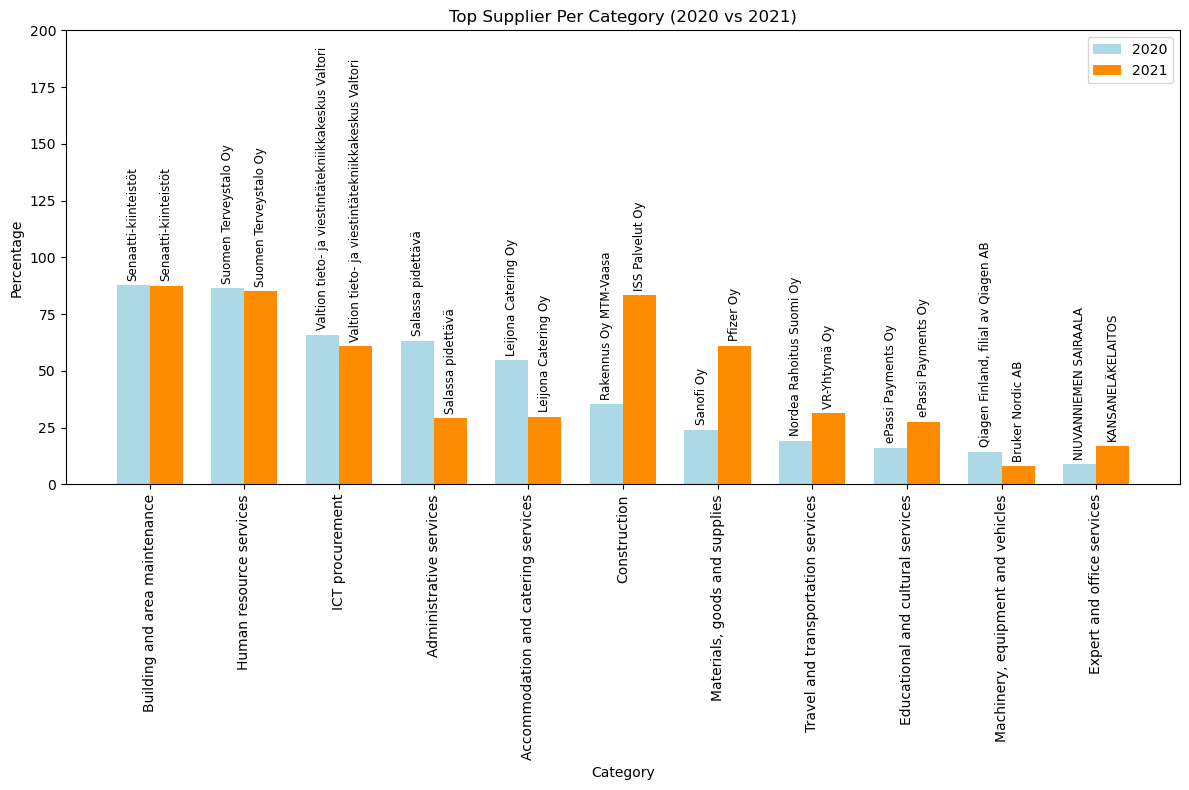

In [52]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.35

# X locations for the groups
index = np.arange(1, 12)

# Plot bars for 2020 and 2021 side by side
bars1 = ax.bar(index - bar_width / 2, Top_sup_p_cat['pct_2020'], bar_width, label='2020', color='lightblue')
bars2 = ax.bar(index + bar_width / 2, Top_sup_p_cat['pct_2021'], bar_width, label='2021', color='darkorange')

# Adding labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Percentage')
ax.set_title('Top Supplier Per Category (2020 vs 2021)')
ax.set_xticks(index)  # Set tick positions
ax.set_xticklabels(Top_sup_p_cat['hankintakategoria'].unique(), rotation=90, ha='center')  # Set tick labels
ax.set_ylim(0,200)
ax.legend()

# Add supplier names on top of the corresponding bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Annotating for 2020
    ax.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 2, 
            Top_sup_p_cat['toimittaja_nimi_2020'].iloc[i], ha='center', va='bottom', color='black', fontsize=8.5, rotation=90)

    # Annotating for 2021
    ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 2,
            Top_sup_p_cat['toimittaja_nimi_2021'].iloc[i], ha='center', va='bottom', color='black', fontsize=8.5, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig('Top Supplier Per Category (2020 vs 2021)', dpi=100, bbox_inches='tight')